In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd

In [10]:
data=pd.read_csv('iris.csv')
table={
    'petalDims':[
        data[['petal.length','petal.width']].loc[0:49].to_numpy()
        ,data[['petal.length','petal.width']].loc[50:99].to_numpy()
        ,data[['petal.length','petal.width']].loc[100:149].to_numpy()
    ]
    ,'variety':[
        data[['variety']].loc[0:49].to_numpy()
        ,data[['variety']].loc[50:99].to_numpy()
        ,data[['variety']].loc[100:149].to_numpy()

    ]
    }
petal=np.array([table['petalDims'][0],table['petalDims'][1]]).reshape(100,2)
print(petal)
varieties=np.array([table['variety'][0],table['variety'][1]]).flatten()
print(varieties)
min(petal[:,0])

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

1.0

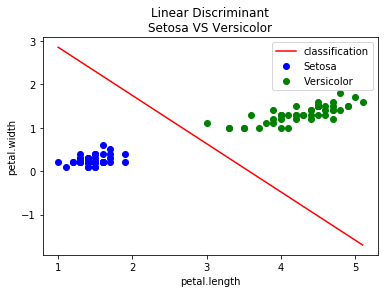

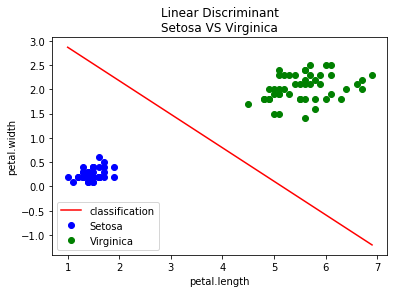

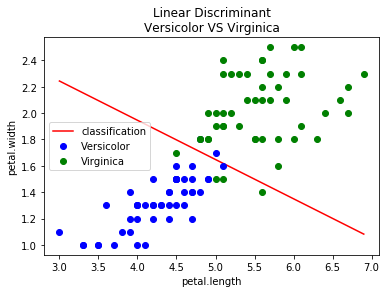

In [3]:
#----------------------------plotting Data with LinearDiscriminantAnalysis--------------------------------
for x in range(3):
    for y in range(x+1,3):
        #get Data from table
        petal=np.array([table['petalDims'][x],table['petalDims'][y]]).reshape(100,2)
        varieties=np.array([table['variety'][x],table['variety'][y]]).flatten()
        #train classificator
        clf = LinearDiscriminantAnalysis()
        clf.fit(petal,varieties)
        #find the coef of the line
        w=clf.coef_[0]
        a=-w[0]/w[1]
        xx=np.linspace(min(petal[:,0]),max(petal[:,0]))
        yy0=a*xx-clf.intercept_[0]/w[1]
        #plot
        plt.figure()
        plt.plot(xx,yy0,'r-',label='classification')
        plt.plot(petal[0:49,0],petal[0:49,1],'bo',label=varieties[0])
        plt.plot(petal[50:99,0],petal[50:99,1],'go',label=varieties[99])
        plt.xlabel('petal.length')
        plt.ylabel('petal.width')
        plt.title('Linear Discriminant\n%s VS %s'%(varieties[0],varieties[99]))
        plt.legend()
plt.show()

In [ ]:
# be it make 5 mistakes

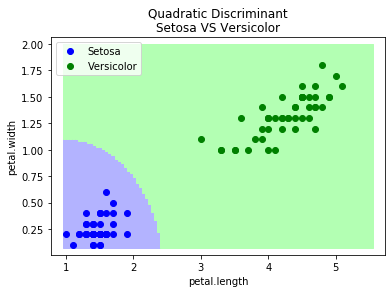

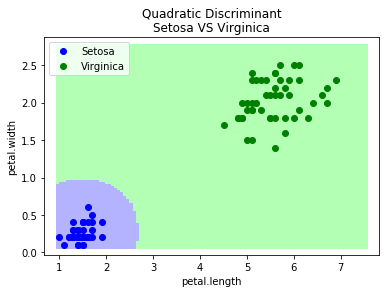

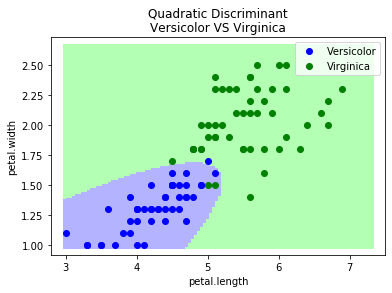

In [4]:
#----------------------------plotting Data with QuadraticDiscriminantAnalysis--------------------------------
for x in range(3):
    for y in range(x+1,3):
        #get Data from table
        petal=np.array([table['petalDims'][x],table['petalDims'][y]]).reshape(100,2)
        varieties=np.array([table['variety'][x],table['variety'][y]]).flatten()
        #train classificator
        clf = QuadraticDiscriminantAnalysis()
        clf.fit(petal,varieties)
        XX=max(petal[:,0])-min(petal[:,0])
        XX=1.1*XX
        YY=max(petal[:,1])-min(petal[:,1])
        YY=1.1*YY
        plt.figure()
        for i in range(101):
            for j in range(101):
                X=min(petal[:,0])+i*(XX/100)
                Y=min(petal[:,1])+j*(YY/100)
                C=clf.predict([[X,Y]])[0]
                if C==varieties[0]:
                    plt.plot(X,Y,marker='s',color=(0.7,0.7,1))
                else:
                    plt.plot(X,Y,marker='s',color=(0.7,1,0.7))
        plt.plot(petal[0:49,0],petal[0:49,1],'bo',label=varieties[0])
        plt.plot(petal[50:99,0],petal[50:99,1],'go',label=varieties[99])
        plt.xlabel('petal.length')
        plt.ylabel('petal.width')
        plt.title('Quadratic Discriminant\n%s VS %s'%(varieties[0],varieties[99]))
        plt.legend()
        plt.show()

In [ ]:
# with a Quadratic Discriminant we get a better results
# it scors 3 mistakes

/home/daniel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/daniel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/daniel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


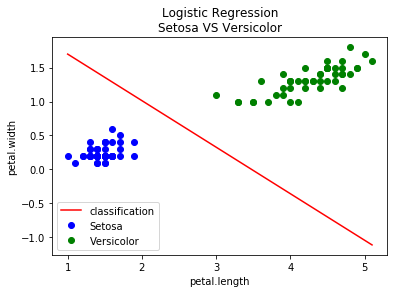

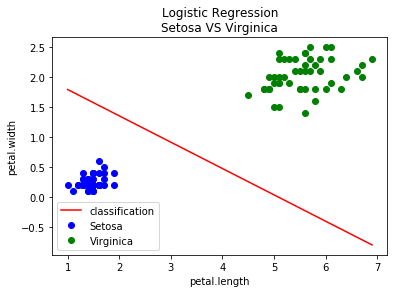

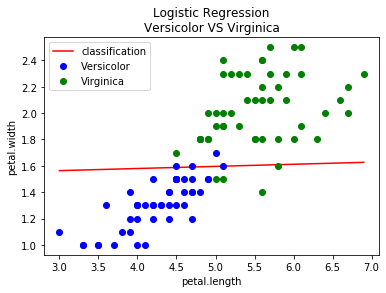

In [5]:
#----------------------------plotting Data with LogisticRegression--------------------------------
for x in range(3):
    for y in range(x+1,3):
        #get Data from table
        petal=np.array([table['petalDims'][x],table['petalDims'][y]]).reshape(100,2)
        varieties=np.array([table['variety'][x],table['variety'][y]]).flatten()
        #train classificator
        clf = LogisticRegression()
        clf.fit(petal,varieties)
        #find the coef of the line
        w=clf.coef_[0]
        a=-w[0]/w[1]
        xx=np.linspace(min(petal[:,0]),max(petal[:,0]))
        yy0=a*xx-clf.intercept_[0]/w[1]
        #plot
        plt.figure()
        plt.plot(xx,yy0,'r-',label='classification')
        plt.plot(petal[0:49,0],petal[0:49,1],'bo',label=varieties[0])
        plt.plot(petal[50:99,0],petal[50:99,1],'go',label=varieties[99])
        plt.xlabel('petal.length')
        plt.ylabel('petal.width')
        plt.title('Logistic Regression\n%s VS %s'%(varieties[0],varieties[99]))
        plt.legend()
plt.show()

In [ ]:
#for Logistic Regression we still make 5 mistakes but there is a problem with 3 points on the line that we cannot decide

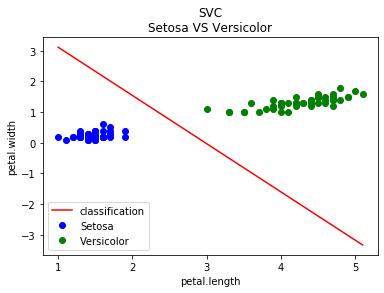

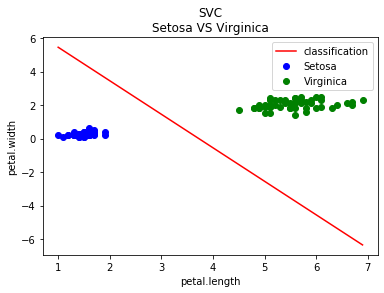

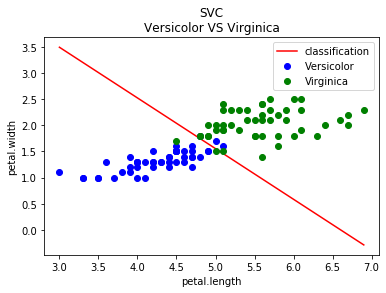

In [6]:
#----------------------------plotting Data with SVC--------------------------------
for x in range(3):
    for y in range(x+1,3):
        #get Data from table
        petal=np.array([table['petalDims'][x],table['petalDims'][y]]).reshape(100,2)
        varieties=np.array([table['variety'][x],table['variety'][y]]).flatten()
        #train classificator
        clf = SVC(kernel='linear')
        clf.fit(petal,varieties)
        #find the coef of the line
        w=clf.coef_[0]
        a=-w[0]/w[1]
        xx=np.linspace(min(petal[:,0]),max(petal[:,0]))
        yy0=a*xx-clf.intercept_[0]/w[1]
        #plot
        plt.figure()
        plt.plot(xx,yy0,'r-',label='classification')
        plt.plot(petal[0:49,0],petal[0:49,1],'bo',label=varieties[0])
        plt.plot(petal[50:99,0],petal[50:99,1],'go',label=varieties[99])
        plt.xlabel('petal.length')
        plt.ylabel('petal.width')
        plt.title('SVC\n%s VS %s'%(varieties[0],varieties[99]))
        plt.legend()
plt.show()

In [ ]:
# for SVC we get a better results for a line classifation with 4 mistakes